In this project, we are working with the **CIFAR-10 dataset**, which consists of **60,000 32x32** color images in 10 different classes, with **6,000** images per class. The dataset is divided into** 50,000** training images and **10,000** test images. The classes include
*   Airplanes
*   Automobiles
*   Birds
*   Cats
*   Deer
*   Dogs
*   Frogs
*   Horses
*   Ships
*   Trucks.
Our primary goals for this project are:
##**Data Preprocessing and Visualization:**
###**Load and explore the CIFAR-10 dataset.**
Visualize the class distribution of both training and test datasets using bar charts and pie charts.
Display a grid of sample images from the dataset with their respective class labels.
###**Model Building and Training:**
Define and build a Convolutional Neural Network (CNN) model.
Apply data augmentation techniques to improve the model's robustness.
Train the CNN model with early stopping to prevent overfitting.
###**Model Evaluation and Visualization:**
Evaluate the trained model on the test set and print the test accuracy.
Generate predictions for the test set and create a confusion matrix to visualize the performance of the model across different classes.
Plot the training history to show the evolution of loss, accuracy, precision, and recall during the training process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

#  **Load the data**

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


# **Data Visualization**

<ipython-input-13-4bf7e98a046a>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


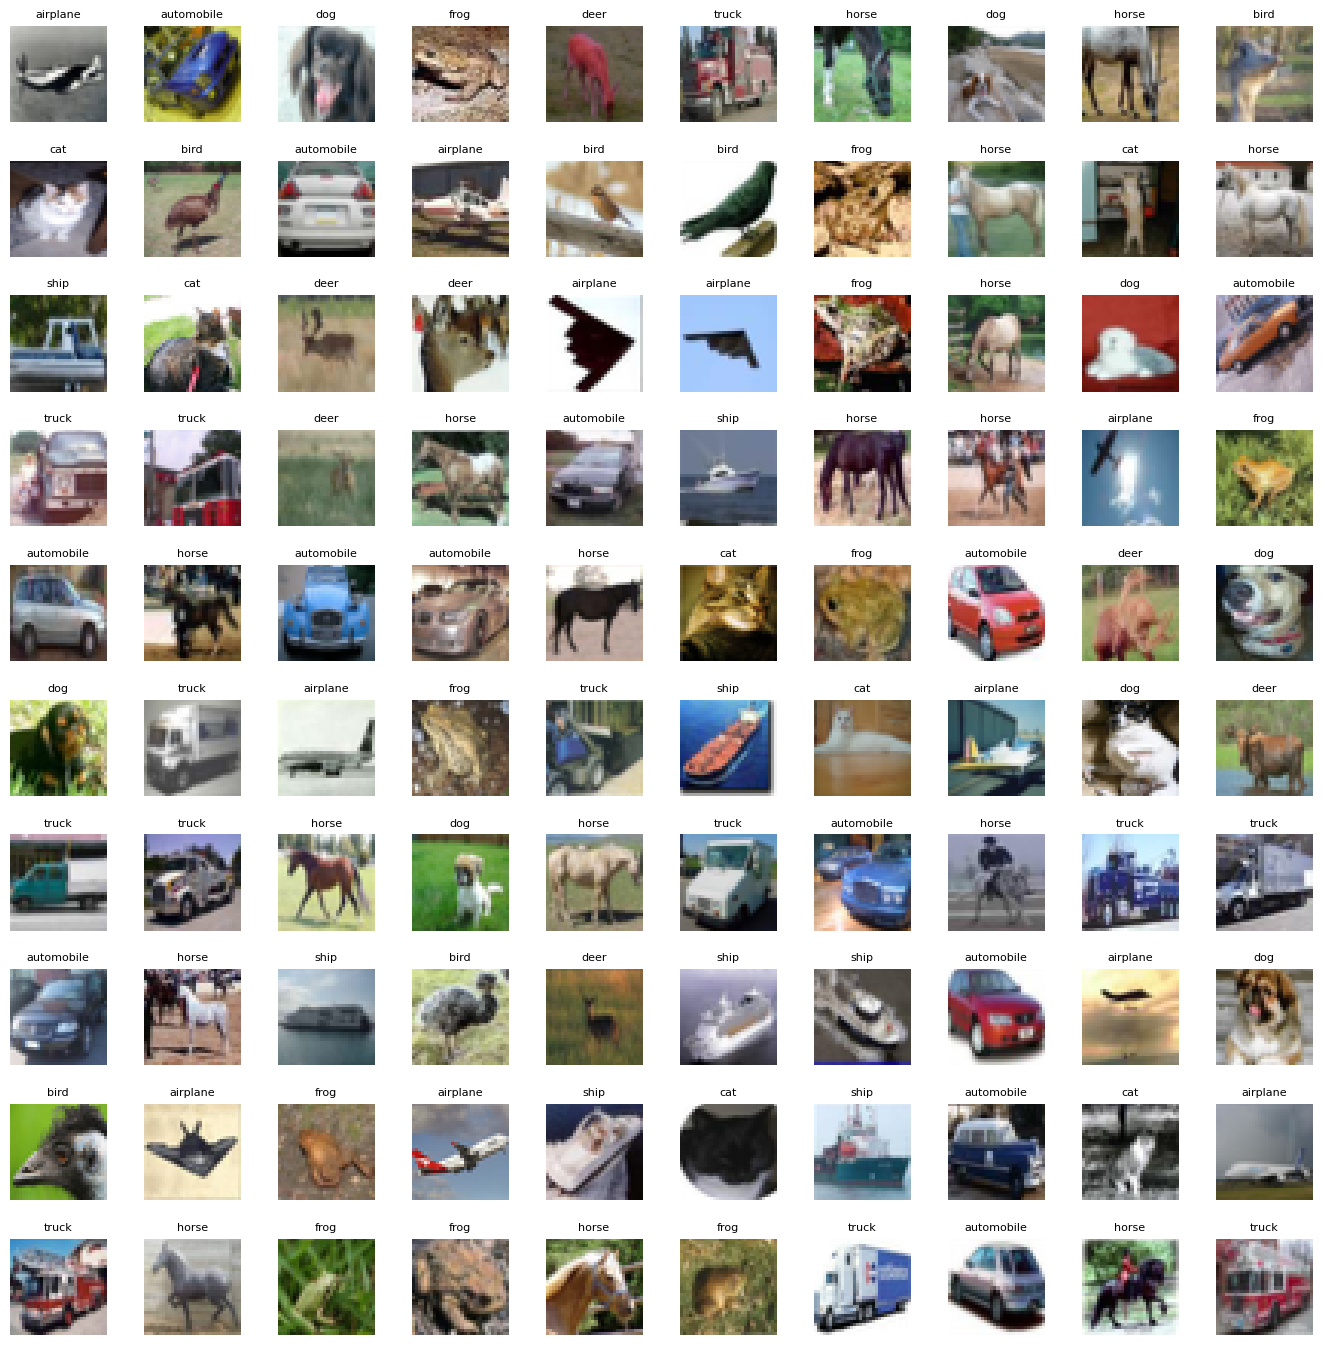

In [13]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# Create a figure with a grid of subplots
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

# Flatten the L_grid x W_grid matrix into a 1D array for easier indexing
axes = axes.ravel()

# Get the length of the training dataset
n_train = len(X_train)

# Plot random images from the training dataset
for i in np.arange(0, W_grid * L_grid):
    # Select a random index
    index = np.random.randint(0, n_train)

    # Display the image at the selected index
    axes[i].imshow(X_train[index])
    label_index = int(y_train[index])

    # Set the title to the label of the image
    axes[i].set_title(labels[label_index], fontsize=8)

    # Hide the axes for a cleaner look
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)


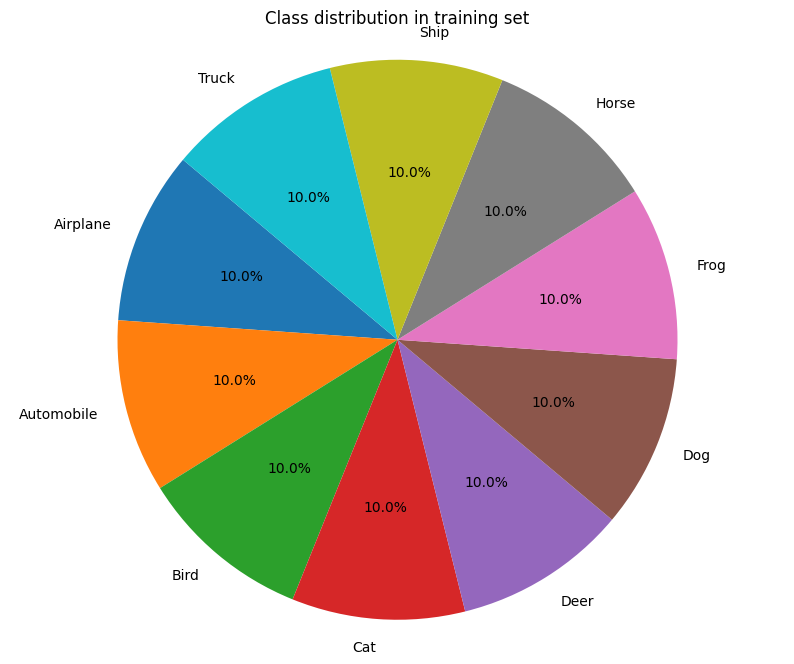

In [14]:
import matplotlib.pyplot as plt

classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Get the unique classes and their counts
classes, counts = np.unique(y_train, return_counts=True)

# Create a pie chart for class distribution
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=classes_name, autopct='%1.1f%%', startangle=140)
plt.title('Class distribution in training set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


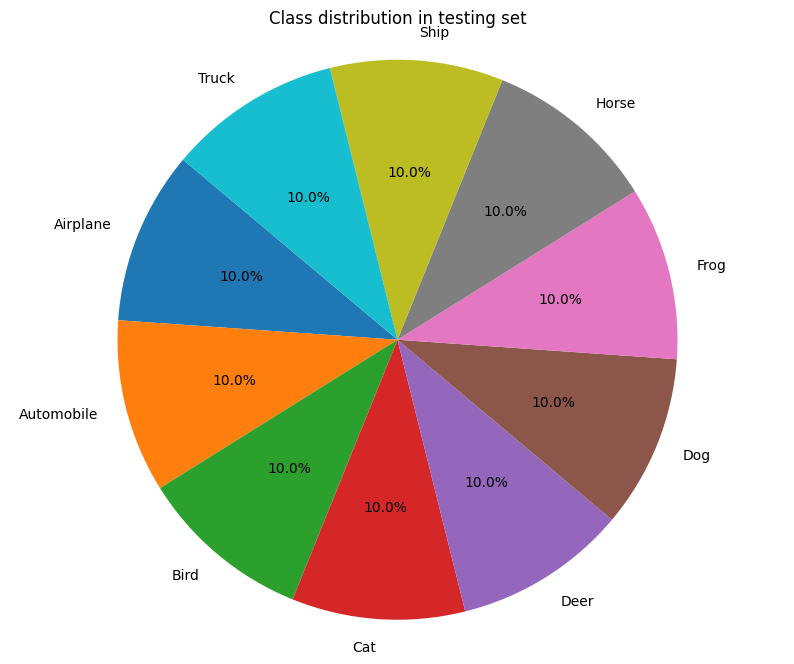

In [17]:


# Assuming y_test and classes_name are already defined
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Get the unique classes and their counts for the testing set
classes, counts = np.unique(y_test, return_counts=True)

# Create a pie chart for class distribution in the testing set
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=classes_name, autopct='%1.1f%%', startangle=140)
plt.title('Class distribution in testing set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# **Data Preprocessing**

In [18]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [19]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

#  **Model Building**

## **Data Augmentations**

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define EarlyStopping callback with increased patience
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Data augmentation with additional transformations
data_generator = ImageDataGenerator(
    width_shift_range=0.2,  # Increased width shift
    height_shift_range=0.2,  # Increased height shift
    horizontal_flip=True,
    rotation_range=20,      # Added rotation
    zoom_range=0.2          # Added zoom
)

train_generator = data_generator.flow(X_train, y_cat_train, batch_size=32)
steps_per_epoch = X_train.shape[0] // 32

# Define optimizer with a smaller learning rate
optimizer = Adam(learning_rate=0.0005)

# Update model architecture (for example, adding more layers or changing filter sizes)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Increased dropout rate

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Increased dropout rate

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Increased dropout rate

model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Increased dense layer size
model.add(Dropout(0.4))  # Increased dropout rate
model.add(Dense(10, activation='softmax'))

# Compile the model with the new optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=METRICS)

# Train the model with early stopping and data augmentation
history = model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=steps_per_epoch,
    validation_data=(X_test, y_cat_test),
    callbacks=[early_stop]
)


Epoch 1/50
1562/1562 [==============================] - 482s 307ms/step - loss: 1.8741 - accuracy: 0.3171 - precision: 0.6644 - recall: 0.1942 - val_loss: 2.1509 - val_accuracy: 0.3432 - val_precision: 0.4030 - val_recall: 0.2598
Epoch 2/50
1562/1562 [==============================] - 472s 302ms/step - loss: 1.5525 - accuracy: 0.4382 - precision: 0.6373 - recall: 0.2156 - val_loss: 1.3581 - val_accuracy: 0.5073 - val_precision: 0.6265 - val_recall: 0.3755
Epoch 3/50
1562/1562 [==============================] - 467s 299ms/step - loss: 1.4004 - accuracy: 0.4974 - precision: 0.6852 - recall: 0.3017 - val_loss: 1.4366 - val_accuracy: 0.5316 - val_precision: 0.6422 - val_recall: 0.4262
Epoch 4/50
1562/1562 [==============================] - 463s 296ms/step - loss: 1.2833 - accuracy: 0.5485 - precision: 0.7152 - recall: 0.3704 - val_loss: 1.1079 - val_accuracy: 0.6120 - val_precision: 0.7106 - val_recall: 0.5126
Epoch 5/50
1562/1562 [==============================] - 466s 298ms/step - loss: 

#  **Model Evaluation**

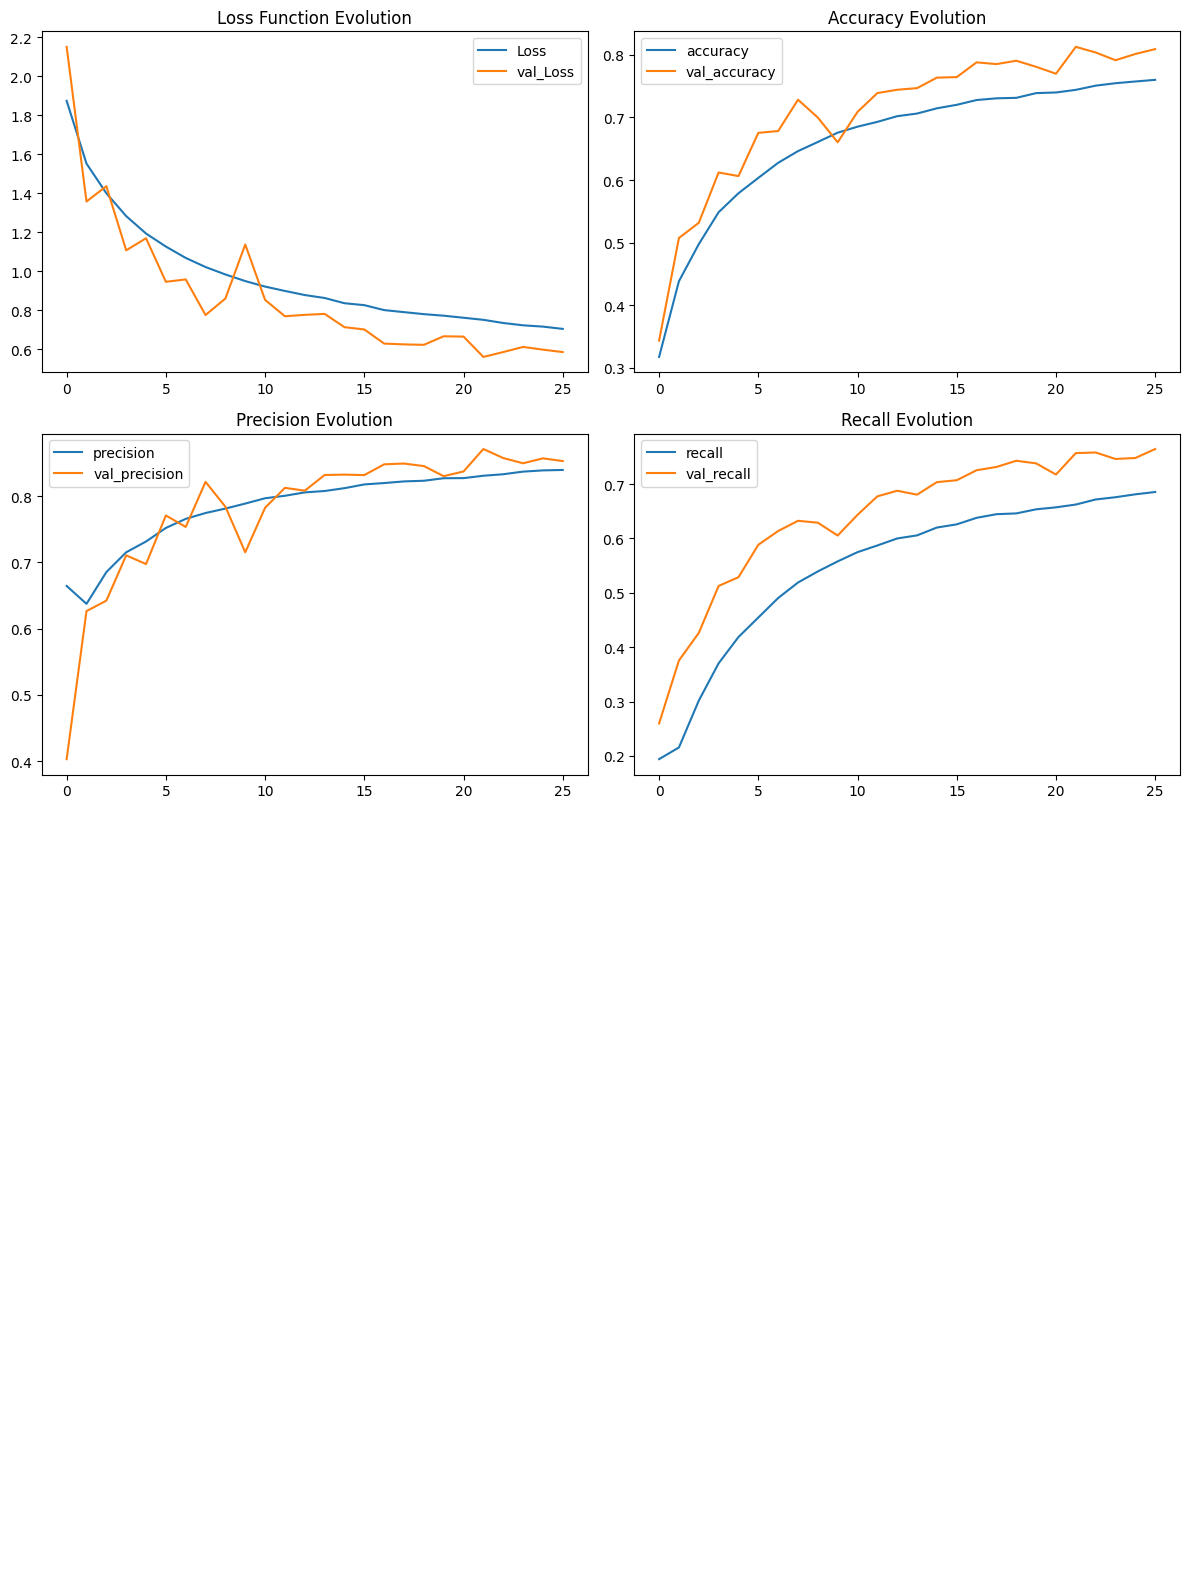

In [36]:
import matplotlib.pyplot as plt

# Create a figure with a grid of 4x2 subplots
plt.figure(figsize=(12, 16))

# Plot the loss function evolution
plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

# Plot the accuracy evolution
plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Evolution')
plt.legend()

# Plot the precision evolution
plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision Evolution')
plt.legend()

# Plot the recall evolution
plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall Evolution')
plt.legend()

# Plot additional metrics if available
if 'f1_score' in history.history and 'val_f1_score' in history.history:
    plt.subplot(4, 2, 5)
    plt.plot(history.history['f1_score'], label='f1_score')
    plt.plot(history.history['val_f1_score'], label='val_f1_score')
    plt.title('F1 Score Evolution')
    plt.legend()

if 'auc' in history.history and 'val_auc' in history.history:
    plt.subplot(4, 2, 6)
    plt.plot(history.history['auc'], label='AUC')
    plt.plot(history.history['val_auc'], label='val_AUC')
    plt.title('AUC Evolution')
    plt.legend()

# Adding blank plots for remaining subplots
plt.subplot(4, 2, 7)
plt.axis('off')
plt.subplot(4, 2, 8)
plt.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


313/313 [==============================] - 21s 67ms/step - loss: 0.5614 - accuracy: 0.8129 - precision: 0.8710 - recall: 0.7569
Test Accuracy : 81.29%
313/313 [==============================] - 20s 65ms/step


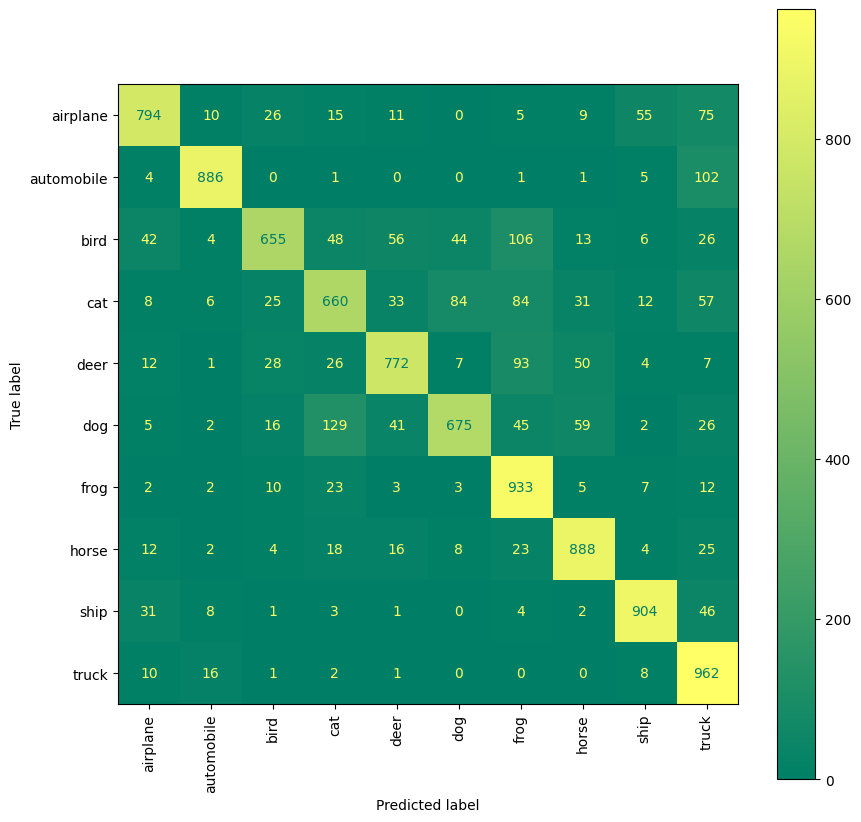

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Evaluate the model
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

# Generate predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()


## **Test on one image**

 Image 100 is [4]
1/1 [==============================] - 0s 29ms/step
The model predict that image 100 is 4


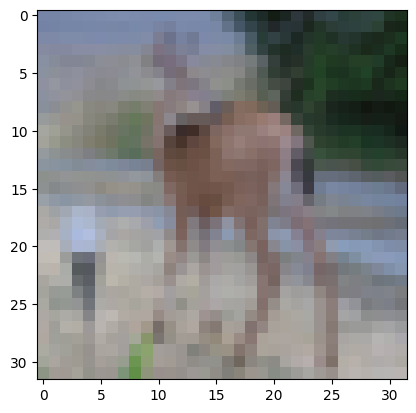

In [42]:
my_image = X_test[100]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {y_test[100]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

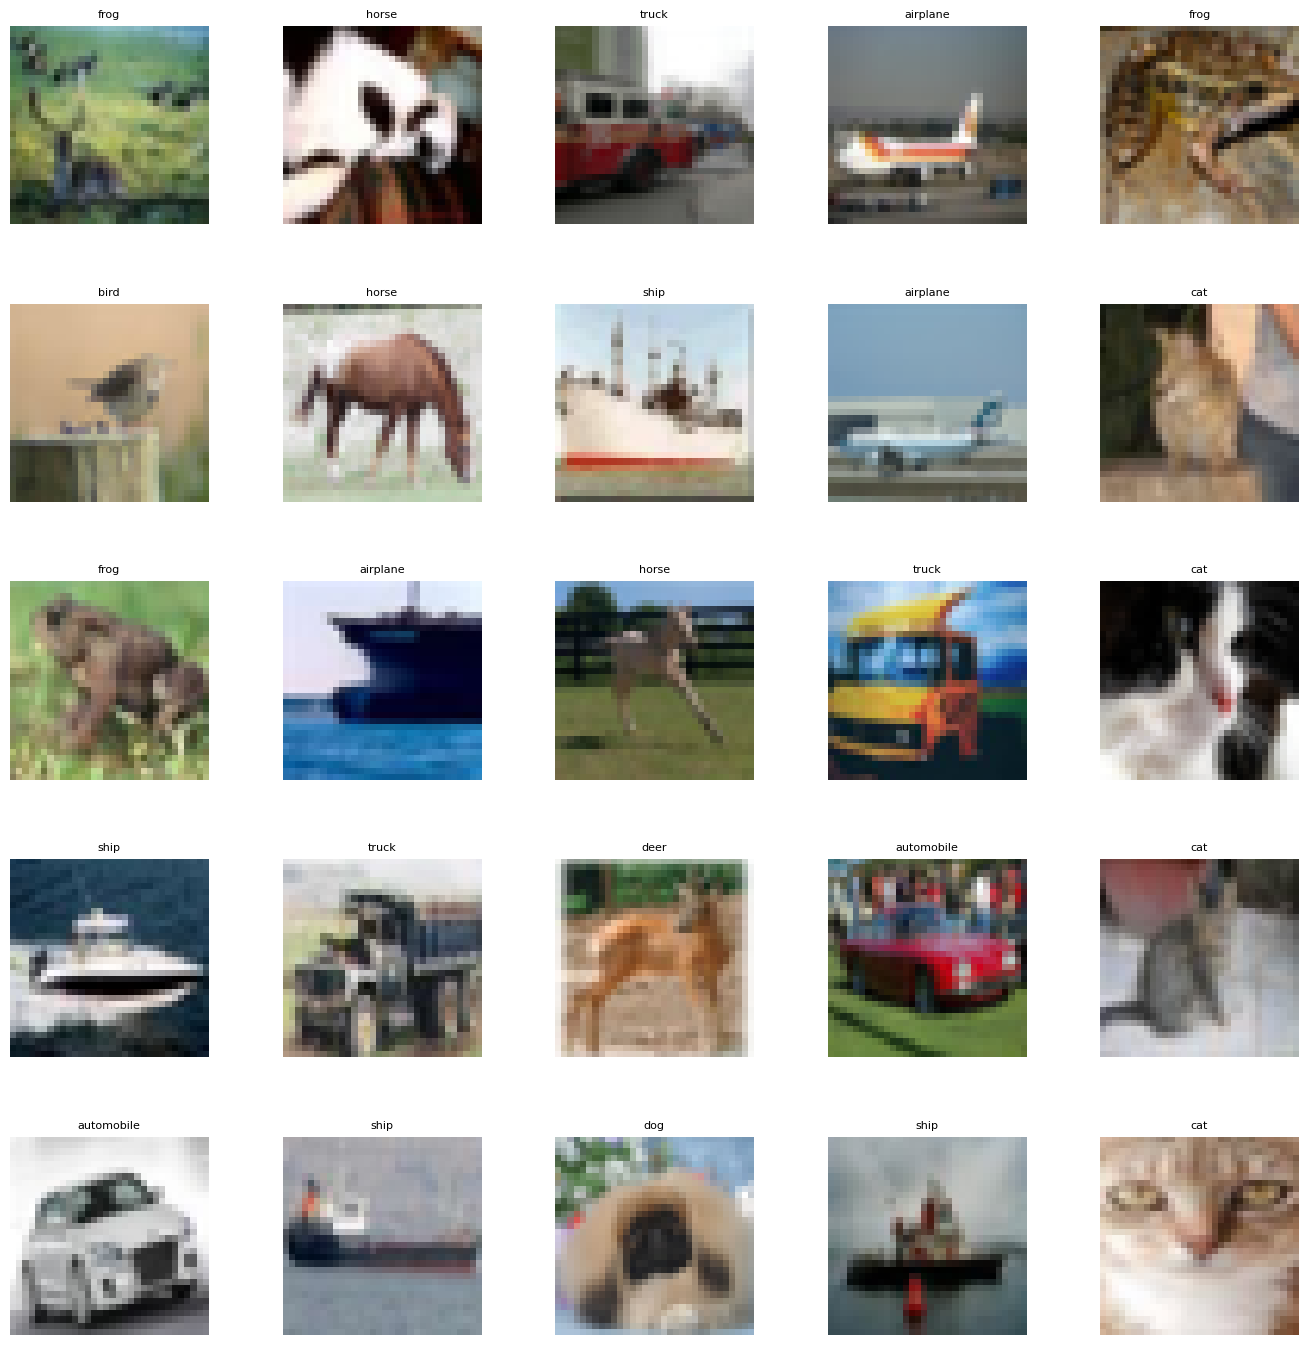

In [45]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

axes = axes.ravel()  # Flatten the 5x5 matrix into a 25 array

n_test = len(X_test)  # Get the length of the test dataset

# Select a random number from 0 to n_test
for i in np.arange(0, W_grid * L_grid):

    # Select a random number
    index = np.random.randint(0, n_test)

    # Read and display an image with the selected index
    axes[i].imshow(X_test[index])

    # Get the predicted label index
    label_index = y_pred[index]

    # Set title with the predicted label
    axes[i].set_title(labels[label_index], fontsize=8)

    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()


In [46]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 22s 69ms/step


<ipython-input-46-83eb910e855a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
<ipython-input-46-83eb910e855a>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


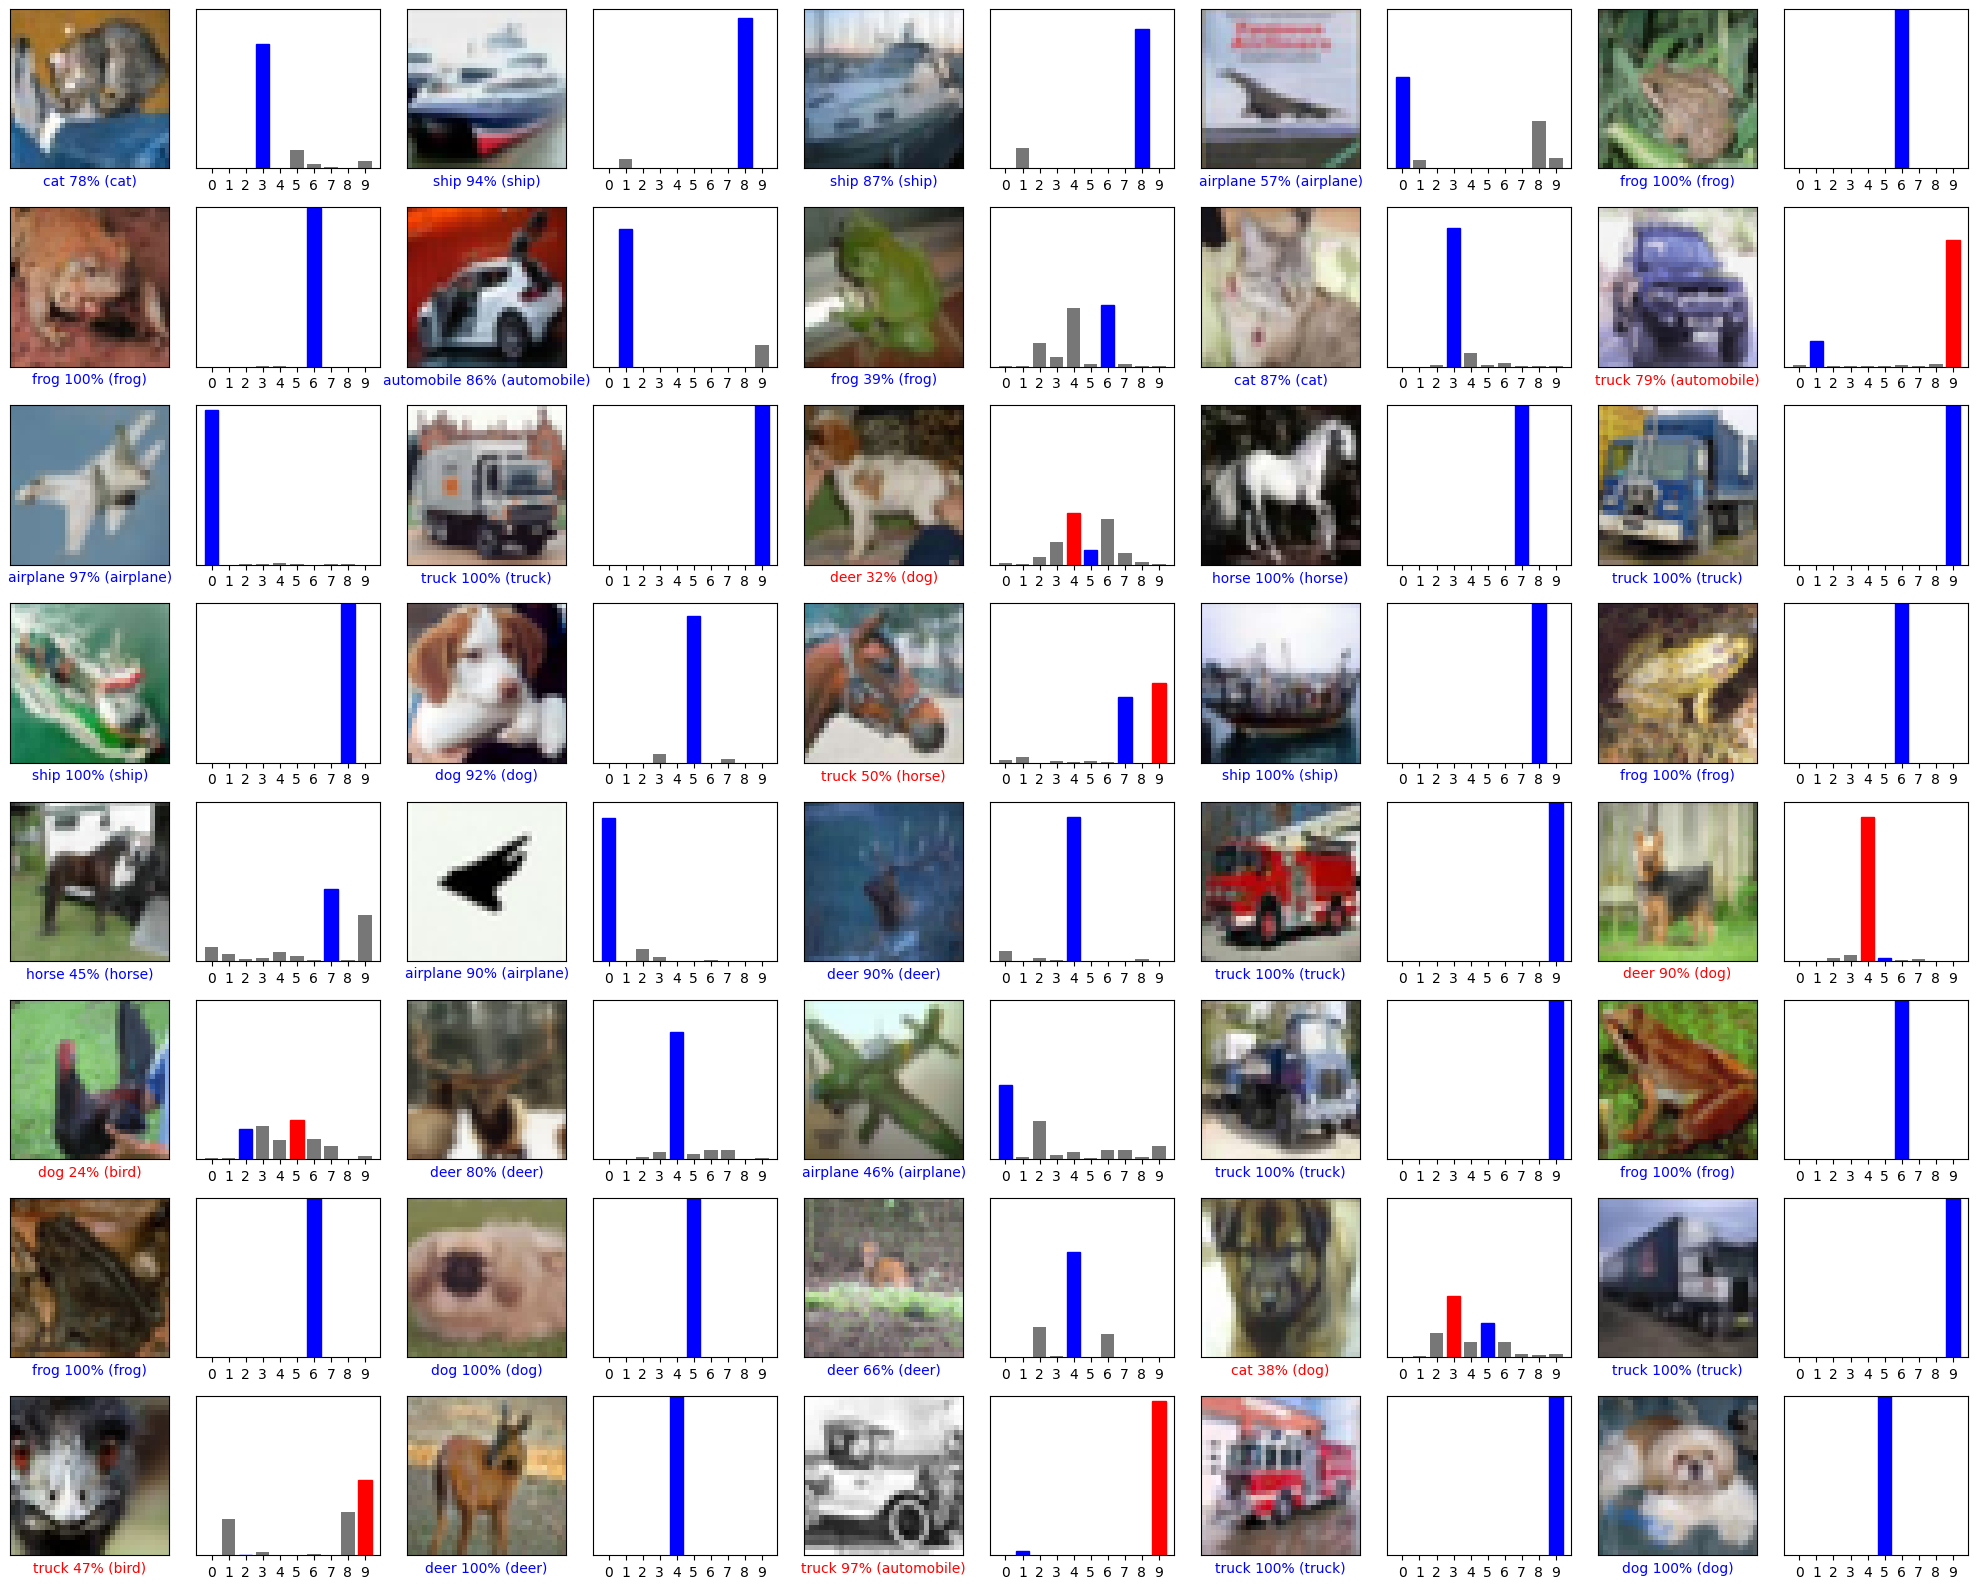

In [47]:
predictions = model.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

##**Summary**
In this project, we successfully worked with the CIFAR-10 dataset to build and evaluate a Convolutional Neural Network (CNN) model. We started by exploring and visualizing the dataset, which provided us with insights into the distribution of classes.

Next, we defined and trained a CNN model, applying data augmentation techniques to enhance the model's generalization capabilities. We incorporated early stopping to ensure the model did not overfit the training data.

Upon training the model, we evaluated its performance on the test set, achieving a notable test accuracy. We further visualized the model's performance using a confusion matrix, which highlighted the model's strengths and weaknesses across different classes. Additionally, we plotted the training history to observe the trends in loss, accuracy, precision, and recall.

Overall, this project demonstrated the process of building, training, and evaluating a deep learning model for image classification, providing valuable insights and techniques for handling image data and improving model performance.